In [1]:
import numpy as np
import torch
import torchvision
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.models as models
from sklearn.manifold import TSNE
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms



In [4]:
train_path = "./datasets/CNN_data/IJ/train"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

train_transform = torchvision.transforms.Compose([
                                                transforms.Resize((128,128)),
                                                transforms.ToTensor()
])

# torchvision.datasets.ImageFolder를 사용하여 지정된 경로에 폴더 별로 라벨링을 진행
train_data = torchvision.datasets.ImageFolder(train_path, transform=train_transform)

# 데이터 불러오기 위한 dataloader, train, validation에 관한 각각의 dataloader를 적용
batch_size = 256 # 한번에 불러올 데이터의 batch 사이즈
dataloader_train = DataLoader(train_data, batch_size=batch_size, shuffle=True)

model = models.resnet50(pretrained=True, progress=True)

# 마지막 layer를 7로 설정
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)
model.to(device)
print(model)

# 학습한 모델을 불러옴
state = torch.load('weights/Model_7_roc.pth', map_location=torch.device('cpu'))
model.load_state_dict(state['state_dict'])

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

<All keys matched successfully>

In [5]:
actual = []
deep_features = []

model.eval()
with torch.no_grad():
    for data in dataloader_train:
        images, labels = data[0].to(device), data[1].to(device)
        features = model(images) 

        deep_features += features.cpu().numpy().tolist()
        actual += labels.cpu().numpy().tolist()
print(deep_features)
tsne = TSNE(n_components=2, random_state=0) 
cluster = np.array(tsne.fit_transform(np.array(deep_features)))
actual = np.array(actual)

[[-2.8529562950134277, 5.821803569793701, -2.117006301879883, -1.1457691192626953, 0.1202707290649414], [-2.1149985790252686, 6.338393688201904, -2.33794903755188, -0.9879941940307617, -0.8024880290031433], [-1.161532998085022, -1.2899962663650513, 5.548896789550781, -0.7954216003417969, -1.7615758180618286], [-1.9210898876190186, -1.2175034284591675, 5.923662185668945, -1.6156408786773682, -0.9396219849586487], [-2.6564323902130127, -0.6061816811561584, -2.1431591510772705, 0.08626944571733475, 6.31227970123291], [-1.3728445768356323, -2.3843045234680176, -0.7669416069984436, 5.137953281402588, 0.6463318467140198], [5.234409809112549, -1.6524056196212769, -0.8178954720497131, -1.2979705333709717, -1.4387905597686768], [5.893640041351318, -2.066436529159546, -1.0342589616775513, -0.2655836045742035, -2.410564661026001], [-2.5104055404663086, 5.479682445526123, -0.9970940947532654, -0.8606654405593872, -0.6524125933647156], [-1.170485258102417, 4.252829551696777, -1.8187991380691528, -0

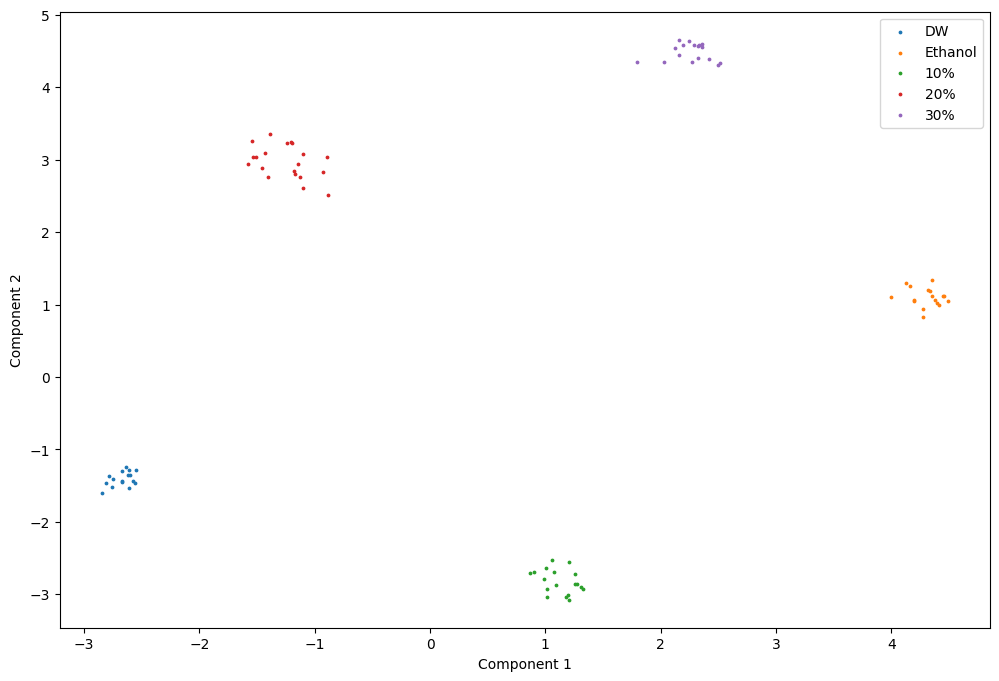

In [20]:
color_palette = sns.color_palette('Set3', 15)
fig ,ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('none') 
# plt.axis('off')
cifar = ['arbicans', 'aureus', 'coli', 'epidermidis', 'glabrata', 'kp', 'para']
for i, label in zip(range(5), cifar):
    idx = np.where(actual == i)
    ax.scatter(cluster[idx, 0], cluster[idx, 1], s=3, color='0.60', label=label)
# ax.set_title('Visualization of Deep Features')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()

plt.show()

C:\Users\Juchan\AppData\Local\Temp\ipykernel_74176\4055584023.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], marker='s', c=fg_color, label=label)
C:\Users\Juchan\AppData\Local\Temp\ipykernel_74176\4055584023.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], marker='s', c=fg_color, label=label)
C:\Users\Juchan\AppData\Local\Temp\ipykernel_74176\4055584023.py:32: UserWarning: *c

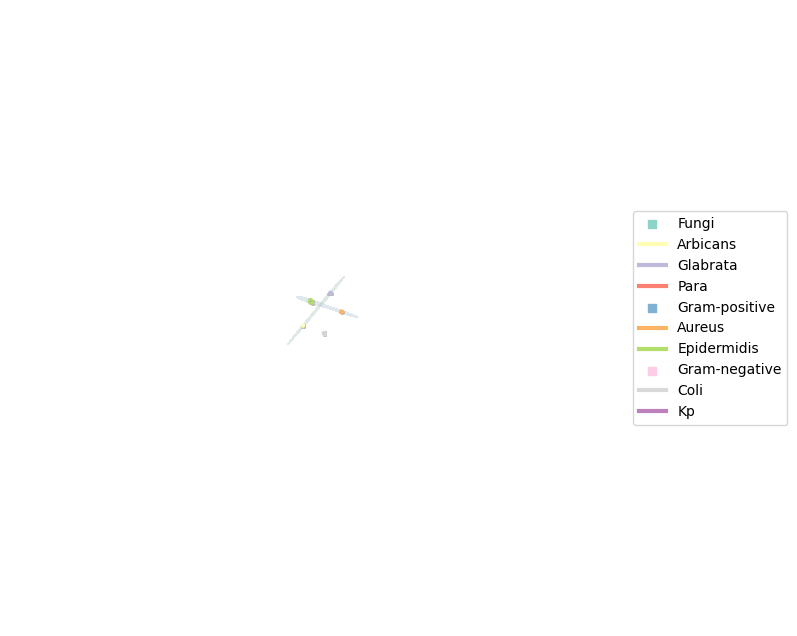

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_islands(bg_points, bg_name, *fg_specs, alpha=0.2, z_limit=15, colors=None):
    default_fg_colors = colors or sns.color_palette('Set3')

    sns.scatterplot(x=bg_points[:, 0], y=bg_points[:, 1],
                    s=3, color='0.60', label=bg_name)

    for fg_spec in fg_specs:
        fg_color = fg_spec.get('color', default_fg_colors[0])
        fg_scatter = fg_spec.get('scatter', False)
        fg_scatter_size = fg_spec.get('scatter_size', 5)
        fg_filled = fg_spec.get('filled', False)
        fg_level_to_plot = fg_spec.get('level_to_plot', 0.25)
        x, y = fg_spec['data'][:, 0], fg_spec['data'][:, 1]
        label = fg_spec['label']

        if fg_scatter:
            sns.scatterplot(x=x, y=y, s=fg_scatter_size, color=fg_color, label=label)

        if fg_filled:
            sns.kdeplot(x=x, y=y, color=fg_color, fill=True,
                        thresh=fg_level_to_plot, alpha=alpha, levels=2, bw_method=0.7)
        else:
            sns.kdeplot(x=x, y=y, color=fg_color, fill=False,
                        thresh=fg_level_to_plot, levels=2, bw_method=0.6)

        # Generate the legend entry
        if fg_filled:
            plt.scatter([], [], marker='s', c=fg_color, label=label)
        else:
            plt.plot([], [], c=fg_color, linewidth=3, label=label)

    plt.xlim([-z_limit - 0.6, z_limit + 0.6])
    plt.ylim([-z_limit - 0.6, z_limit + 0.6])
    plt.gca().set_aspect('equal', adjustable='box')


def plot_odor_islands(data, actual, z_limit=15):
    plt.figure(figsize=(12, 8))
    main_color_palette = sns.color_palette('Set3') 
    fg_specs = []

    # Define major and subcategories
    categories = [('fungi', ['arbicans', 'glabrata', 'para']),
                  ('gram-positive', ['aureus', 'epidermidis']),
                  ('gram-negative', ['coli', 'kp'])]

    i = 0
    for main_group, subgroups in categories:
        main_indices = [cifar.index(label) for label in subgroups]
        main_embeddings = data[np.isin(actual, main_indices)]
        fg_specs.append({'data': main_embeddings,
                         'filled': True,
                         'scatter': False,
                         'label': main_group.capitalize(),
                         'color': main_color_palette[i]})

        for j, subgroup in enumerate(subgroups):
            subgroup_index = cifar.index(subgroup)
            island_embeddings = data[actual == subgroup_index]
            fg_specs.append({'data': island_embeddings,
                             'filled': False,
                             'scatter': False,
                             'label': subgroup.capitalize(),
                             'color': color_palette[i + j + 1]})

        plot_islands(data, None, *fg_specs, z_limit=z_limit)
        i += len(subgroups) + 1
        fg_specs = []

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


cifar = ['arbicans', 'aureus', 'coli', 'epidermidis', 'glabrata', 'kp', 'para']
plot_odor_islands(cluster, actual, z_limit=55)
plt.axis('off')
plt.show()